# Getting Started with IRacket with Pictures

This follows the examples from Racket's [Quick tutorial](http://docs.racket-lang.org/quick/index.html).

IRacket is like a REPL; it doesn't support treating the whole notebook as one module, so we can't use `#lang slideshow`.
We use `require` instead.

In [1]:
(require pict)

## Ready, Set, Go!

In [2]:
(circle 10)

Did you know that the area of a circle is given by

$$ A = \pi r^2 $$

where $A$ is the area and $r$ is the radius? And did you know that you could have math inside of markdown cells?

In [3]:
(rectangle 10 20)

In [4]:
(hc-append (circle 10) (rectangle 10 20))

In [5]:
;; LIMITATION: IRacket evaluates everything in a cell, but only returns the last result:
(circle 10) ;; doesn't show up
(rectangle 10 20)

In [6]:
;; LIMITATION: IRacket can draw picts, but not inside of other data structures:
(list (circle 10) (rectangle 10 20))

(#(struct:pict (prog #<procedure:...rivate/utils.rkt:282:8> 10) 10 10 10 0 () #f #f) #(struct:pict (prog #<procedure:...rivate/utils.rkt:282:8> 20) 10 20 20 0 () #f #f))

In [7]:
(define (square n)
  ; A semi-colon starts a line comment.
  ; The expression below is the function body.
  (filled-rectangle n n))

(square 20)

In [8]:
(define (four p)
  (define two-p (hc-append p p))
  (vc-append two-p two-p))

(four (circle 10))

In [9]:
(define (checker p1 p2)
  (let ([p12 (hc-append p1 p2)]
        [p21 (hc-append p2 p1)])
    (vc-append p12 p21)))

(checker (colorize (square 10) "red")
         (colorize (square 10) "black"))

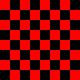

In [10]:
(define (checkerboard p)
  (let* ([rp (colorize p "red")]
         [bp (colorize p "black")]
         [c (checker rp bp)]
         [c4 (four c)])
    (four c4)))

(checkerboard (square 10))

## Functions as values

In [11]:
(define (series mk)
  (hc-append 4 (mk 5) (mk 10) (mk 20)))

In [12]:
(series square)

In [13]:
(series circle)

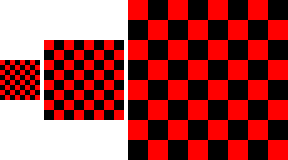

In [14]:
(series (lambda (size) (checkerboard (square size))))

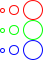

In [15]:
(define (rgb-series mk)
  (vc-append
   (series (lambda (sz) (colorize (mk sz) "red")))
   (series (lambda (sz) (colorize (mk sz) "green")))
   (series (lambda (sz) (colorize (mk sz) "blue")))))

(rgb-series circle)

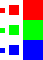

In [16]:
(rgb-series square)

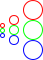

In [17]:
(define (rgb-maker mk)
  (lambda (sz)
    (vc-append (colorize (mk sz) "red")
               (colorize (mk sz) "green")
               (colorize (mk sz) "blue"))))

(series (rgb-maker circle))